In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams
import math
from scipy.optimize import newton
import scipy.constants as sc

rcParams['figure.figsize'] = (4,2)

In [80]:
R = 10 # in au

c_s = 1.5 * R**(-0.25) # in km/s
Omega = (np.sqrt(sc.G * 2e30) * 1.5e11**(-1.5)) * R**(-1.5)
sdot = 2e-12 * (R/10)**(-1.5) # in g/cm2/s
sd = 30 * (1/R) # in g/cm2
rhos = 3.5 # in g/cm3
H = c_s / (1.5e8) / Omega # in au
H_R = c_s / Omega / (1.5e8) / R
u0 = np.sqrt(2*np.pi) / Omega * sdot / sd
rho0 = sd / np.sqrt(2*np.pi) / (c_s * 1e5) * Omega

z = np.linspace(0, 10, int(1e4)) # in H
k = 1/(H_R**2) * (1 - (1 + (H_R * z)**2 ) ** (-1/2))

/tmp/ipykernel_2174218/2542657102.py:5: RuntimeWarning: invalid value encountered in log
  f = lambda u, k: 1/2 * ( u**2 - u0**2 ) - np.log(u/u0) + k


(0.0, 5.0)

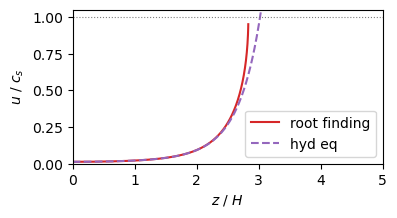

In [ ]:
# set up for the root finding
f = lambda u, k: 1/2 * ( u**2 - u0**2 ) - np.log(u/u0) + k
f_deriv = lambda u, k: u - 1/u
u_guess = u0 * np.exp(k)

u_list = newton(f, u_guess, fprime=f_deriv, args=(k,), maxiter=1000)

plt.plot(z, u_list, label='root finding', c='C3')
plt.plot(z, u_guess, label='hyd eq', ls='--', c='C4')
plt.axhline(1, ls=':', c='C7', lw=0.8)
plt.legend()
plt.xlabel('$z$ / $H$')
plt.ylabel('$u$ / $c_s$')
plt.ylim(0, 1.05)
plt.xlim(0, 5)

#### Function definition

In [24]:
def u_gen(sdot):
    u0 = np.sqrt(2*np.pi) / Omega * sdot / sd
    z = np.linspace(0, 10, int(1e4)) # in H
    k = 1/(H_R**2) * (1 - (1 + (H_R * z)**2 ) ** (-1/2))
    f = lambda u, k: 1/2 * ( u**2 - u0**2 ) - np.log(u/u0) + k
    f_deriv = lambda u, k: u - 1/u
    u_guess = u0 * np.exp(k)
    return newton(f, u_guess, fprime=f_deriv, args=(k,), maxiter=1000)

#### Varying surface mass loss rate and hence also midplane gas velocity

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_2174218/492930272.py:13: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(z, u_list, label='$\dot\Sigma$ = {:.2e}'.format(i), c=color[j])
/tmp/ipykernel_2174218/1047372851.py:4: RuntimeWarning: invalid value encountered in log
  f = lambda u, k: 1/2 * ( u**2 - u0**2 ) - np.log(u/u0) + k
/tmp/ipykernel_2174218/492930272.py:12: RuntimeWarning: some failed to converge after 1000 iterations
  u_list = newton(f, u_guess, fprime=f_deriv, args=(k,), maxiter=1000)


(0.0, 1.5)

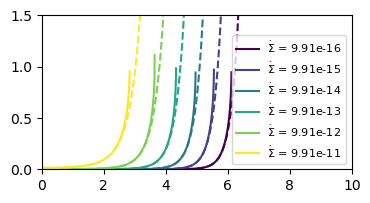

In [ ]:
sdot_list = 1.5*10**np.arange(-14,-8,1.0) * R**(-1.18) # in g/cm2/s
u0_list = np.sqrt(2*np.pi) / Omega * sdot_list / sd
color = cm.viridis(np.linspace(0, 1, len(sdot_list)))

j=0
for i in sdot_list:
    u0 = np.sqrt(2*np.pi) / Omega * i / sd
    u_guess = u0 * np.exp(k)
    u_list = newton(f, u_guess, fprime=f_deriv, args=(k,), maxiter=1000)
    plt.plot(z, u_list, label='$\dot\Sigma$ = {:.2e}'.format(i), c=color[j])
    plt.plot(z, u_guess, c=color[j], ls='--')
    j+=1

plt.legend(prop={'size': 8})
plt.xlim(0, 10)
plt.ylim(0, 1.5)

2.9143535894172352e-55


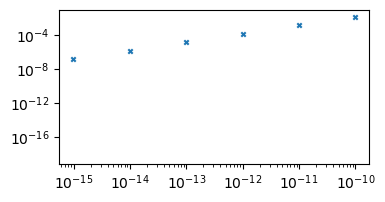

In [44]:
u0_transition = np.exp(-0.5 - (1/H_R)**2)
print(u0_transition)
plt.scatter(sdot_list, u0_list, marker='x', s=10)
plt.axhline(u0_transition, ls='--', c='C7', lw=0.8)
plt.xscale('log')
plt.yscale('log')

#### Comparing the relative strength of terms in the gas EoM

2e-12


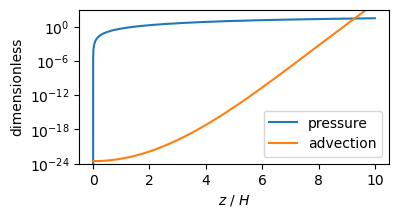

In [96]:
rho = rho0 * np.exp(-k)
plt.plot(z, np.abs(np.log(rho / rho0)), label='pressure')
plt.plot(z, (sdot / c_s * rho0 / rho)**2 / 2, label='advection')
plt.ylim(1e-24,1e3)
plt.yscale('log')
plt.xlabel('$z$ / $H$')
plt.ylabel('dimensionless')
plt.legend()
print(sdot)